# Proyecto 1

**Tema:** Predicción de enfermedades Cardíacas



|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Exploratory Data Analysis
### Two or more Variables

## Summary

Tenemos dos grupos de variables: las numéricas y las categóricas. Además, una variable _target_ a estudiar.


### Variables Numéricas

- Edad (age)
- Presión Arterial en Reposo (trestbps)
- Colesterol Sérico (chol)
- Frecuencia Cardiaca Máxima (thalach)
- Depresion del ST Inducida por Ejercicio en Relación con Reposo (oldpeak)

### Variables Categóricas

- Sexo (sex)
- Tipo de Dolor en Pecho (cp)
- Azucar en Sange en Ayunas (fbs)
- Resultados Electrocardiográficos en Reposo (restecg)
- Angina Inducida por Ejercicio (exang)
- Pendiente Segmento ST de Ejercicio Máximo (slope)
- Número de Vasos Principales coloreados por Fluoroscopia (ca)
- Thalassemia (thal)


### Target

- Presencia de Enfermedad Cardiaca (heartdis)

### Libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns = {
    "age": {'meaning': 'age in years',
            'num': 3},
    "sex": {'meaning': 'sex (1 = male; 0 = female)',
            'num': 4},
    "cp": {'meaning': 'chest pain type 1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic',
           'num': 9},
    "trestbps": {'meaning': 'resting blood pressure (in mm Hg on admission to the hospital)',
                 'num': 10},
    "chol": {'meaning': 'serum cholestoral in mg/dl',
             'num': 12},
    "fbs": {'meaning': '(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)',
            'num': 16},
    "restecg": {'meaning': 'resting electrocardiographic results 0: normal; 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2: showing probable or definite left ventricular hypertrophy by Estes criteria',
                'num': 19},
    "thalach": {'meaning': 'maximum heart rate achieved',
                'num': 32},
    "exang": {'meaning': 'exercise induced angina (1 = yes; 0 = no)',
              'num': 38},
    "oldpeak": {'meaning': 'ST depression induced by exercise relative to rest',
                'num': 40},
    "slope": {'meaning': 'the slope of the peak exercise ST segment 1: upsloping; 2: flat; 3: downsloping',
              'num': 41},
    "ca": {'meaning': 'number of major vessels (0-3) colored by flourosopy',
           'num': 44},
    "thal": {'meaning': '3 = normal; 6 = fixed defect; 7 = reversable defect',
             'num': 51},
    "num": {'meaning': 'diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing; 1: > 50% diameter narrowing',
            'num': 58},
}

df = pd.read_csv("Data/processed.cleveland.data", names=[i for i in columns.keys()])

df.age = df.age.astype(int)
df.sex = df.sex.astype(int)
df.cp = df.cp.astype(int)
df.trestbps = df.trestbps.astype(int)
df.chol = df.chol.astype(int)
df.fbs = df.fbs.astype(int)
df.restecg = df.restecg.astype(int)
df.thalach = df.thalach.astype(int)
df.exang = df.exang.astype(int)
df.slope = df.slope.astype(int)

# ------------
# Null values
# ------------

df['caNull'] = df['ca']
df.loc[df['caNull'] == '?', 'ca'] = float(df.ca.mode()[0])
df.loc[df['caNull'] != '?', 'ca'] = df['ca']
df['ca'] = pd.to_numeric(df['ca']).astype('int32')

df['thalNull'] = df['thal']
df.loc[df['thalNull'] == '?', 'thal'] = float(df.thal.mode()[0])
df.loc[df['thalNull'] != '?', 'thal'] = df['thal']
df['thal'] = pd.to_numeric(df['thal']).astype('int32')

# ------------
# Target
# ------------

df.loc[df['num'] == 0, 'heartdis'] = 0
df.loc[df['num'] != 0, 'heartdis'] = 1
df.heartdis = df.heartdis.astype(int)

# ------------
# Drop columns
# ------------
df.drop(['num', 'caNull', 'thalNull'], axis=1, inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## Correlations Matrix

In [3]:
corr = df.corr()
corr
corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdis
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.365323,0.128303,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.086048,0.380581,0.276816
cp,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.233117,0.262089,0.414446
trestbps,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.097528,0.134424,0.150825
chol,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.123726,0.018351,0.085164
fbs,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.140764,0.064625,0.025264
restecg,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.131749,0.024325,0.169202
thalach,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.265699,-0.274142,-0.417167
exang,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145788,0.325240,0.431894
oldpeak,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.301067,0.342405,0.424510


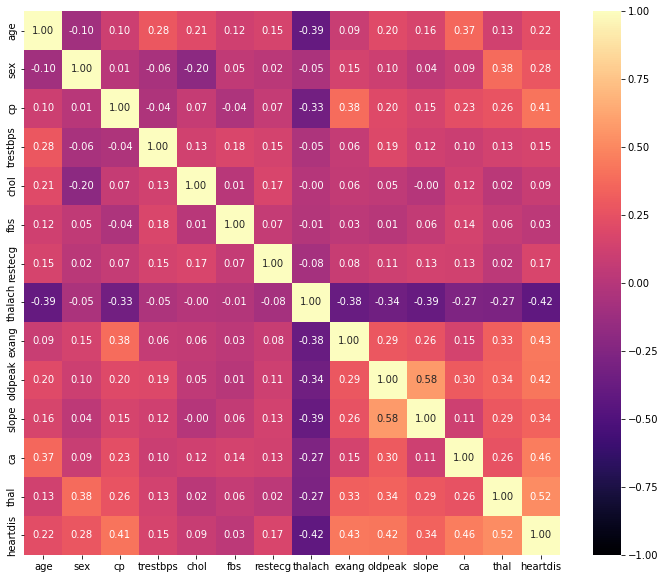

In [4]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap="magma", fmt='.2f', vmin=-1, vmax=1)
plt.show()

## Target VS All

### Age

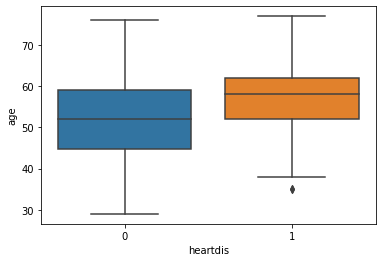

In [5]:
sns.boxplot(data=df, x='heartdis', y='age')
plt.show()

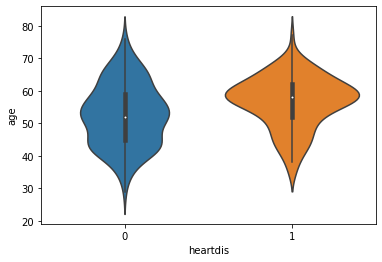

In [6]:
sns.violinplot(data=df, x='heartdis', y='age')
plt.show()

### Sex

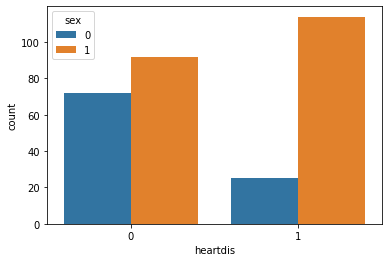

In [7]:
sns.countplot(data=df, x='heartdis', hue='sex')
plt.show()

### Chest Pain

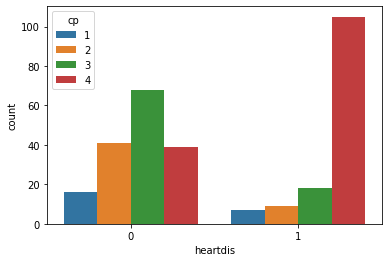

In [8]:
sns.countplot(data=df, x='heartdis', hue='cp')
plt.show()

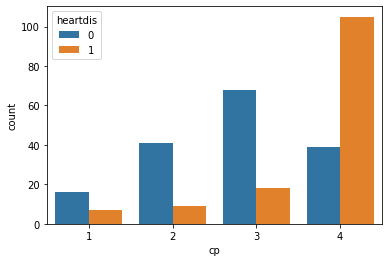

In [9]:
sns.countplot(data=df, hue='heartdis', x='cp')
plt.show()

### Resting Blood Pressure

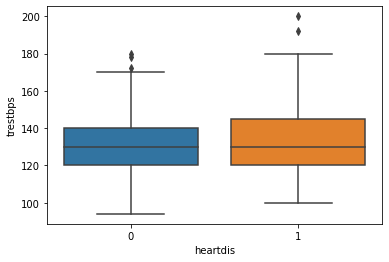

In [10]:
sns.boxplot(data=df, x='heartdis', y='trestbps')
plt.show()

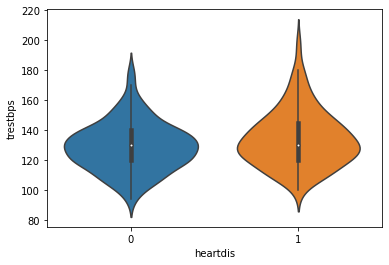

In [11]:
sns.violinplot(data=df, x='heartdis', y='trestbps')
plt.show()

### Fasting Blood Sugar

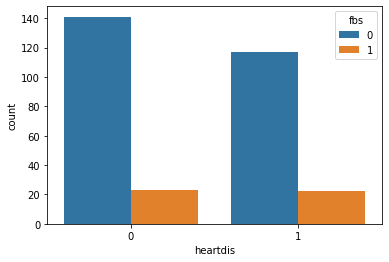

In [12]:
sns.countplot(data=df, x='heartdis', hue='fbs')
plt.show()

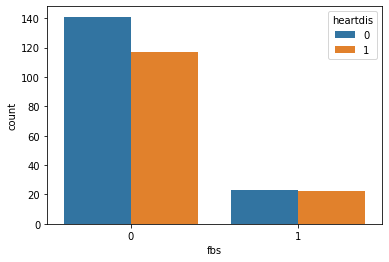

In [13]:
sns.countplot(data=df, hue='heartdis', x='fbs')
plt.show()

### Resting Electrocardiographic Results

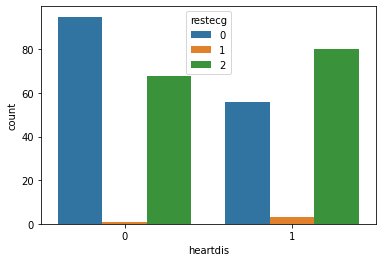

In [14]:
sns.countplot(data=df, x='heartdis', hue='restecg')
plt.show()

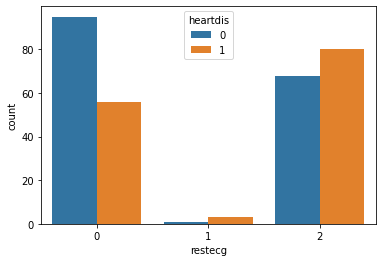

In [15]:
sns.countplot(data=df, hue='heartdis', x='restecg')
plt.show()

### Maximum Heart Rate

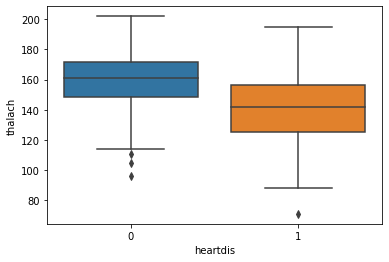

In [16]:
sns.boxplot(data=df, x='heartdis', y='thalach')
plt.show()

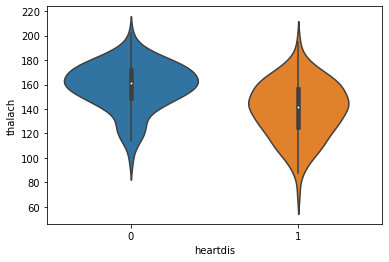

In [17]:
sns.violinplot(data=df, x='heartdis', y='thalach')
plt.show()

### Exercise Induced Angina

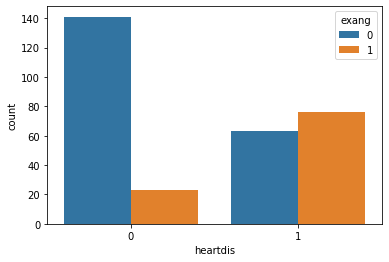

In [18]:
sns.countplot(data=df, x='heartdis', hue='exang')
plt.show()

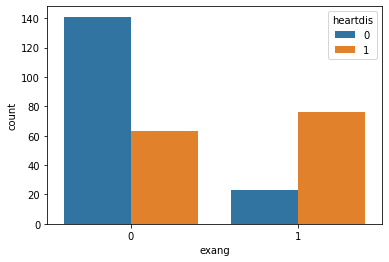

In [19]:
sns.countplot(data=df, hue='heartdis', x='exang')
plt.show()

### ST Depression by Exercise

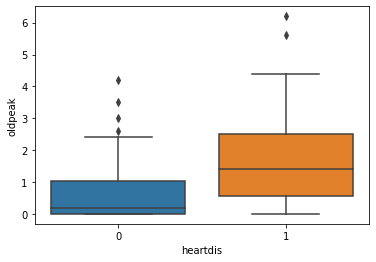

In [20]:
sns.boxplot(data=df, x='heartdis', y='oldpeak')
plt.show()

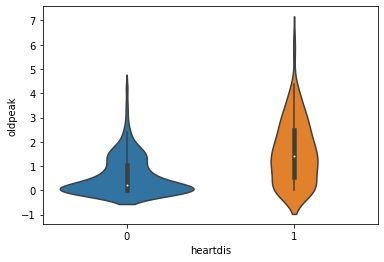

In [21]:
sns.violinplot(data=df, x='heartdis', y='oldpeak')
plt.show()

### Slope in Peak Exercise

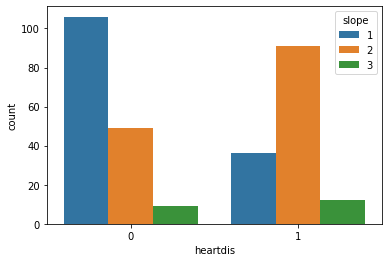

In [22]:
sns.countplot(data=df, x='heartdis', hue='slope')
plt.show()

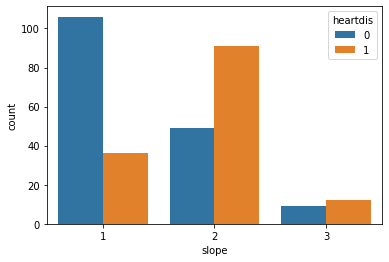

In [23]:
sns.countplot(data=df, hue='heartdis', x='slope')
plt.show()

### Number of Vessels Colored

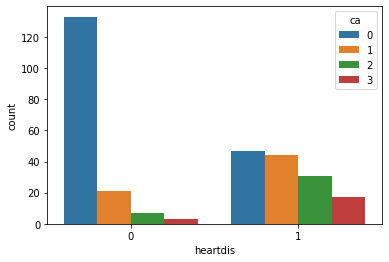

In [24]:
sns.countplot(data=df, x='heartdis', hue='ca')
plt.show()

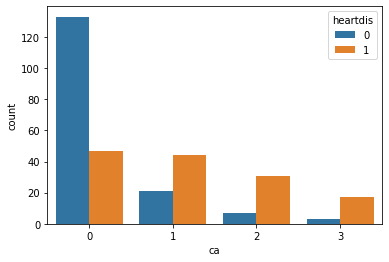

In [25]:
sns.countplot(data=df, hue='heartdis', x='ca')
plt.show()

### Thalassemia

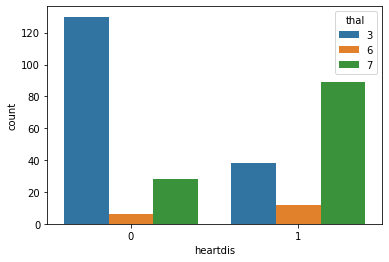

In [26]:
sns.countplot(data=df, x='heartdis', hue='thal')
plt.show()

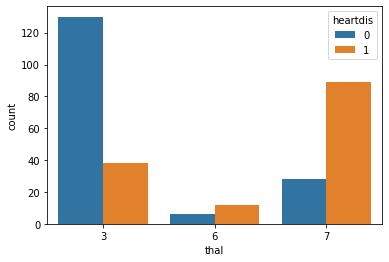

In [27]:
sns.countplot(data=df, hue='heartdis', x='thal')
plt.show()

## Numerical VS Numerical

In [28]:
import plotly.express as px

In [60]:
numdf = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'heartdis']]
fig = px.scatter_matrix(numdf, dimensions=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], opacity=0.5)
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker=dict(size=4))
fig.show()

In [58]:
numdf = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'heartdis']].copy()
numdf['heartdisStr'] = numdf['heartdis'].astype(str)
fig = px.scatter_matrix(numdf, dimensions=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], color='heartdisStr', opacity=0.5)
fig.update_traces(diagonal_visible=False)
fig.update_traces(marker=dict(size=4))
fig.show()

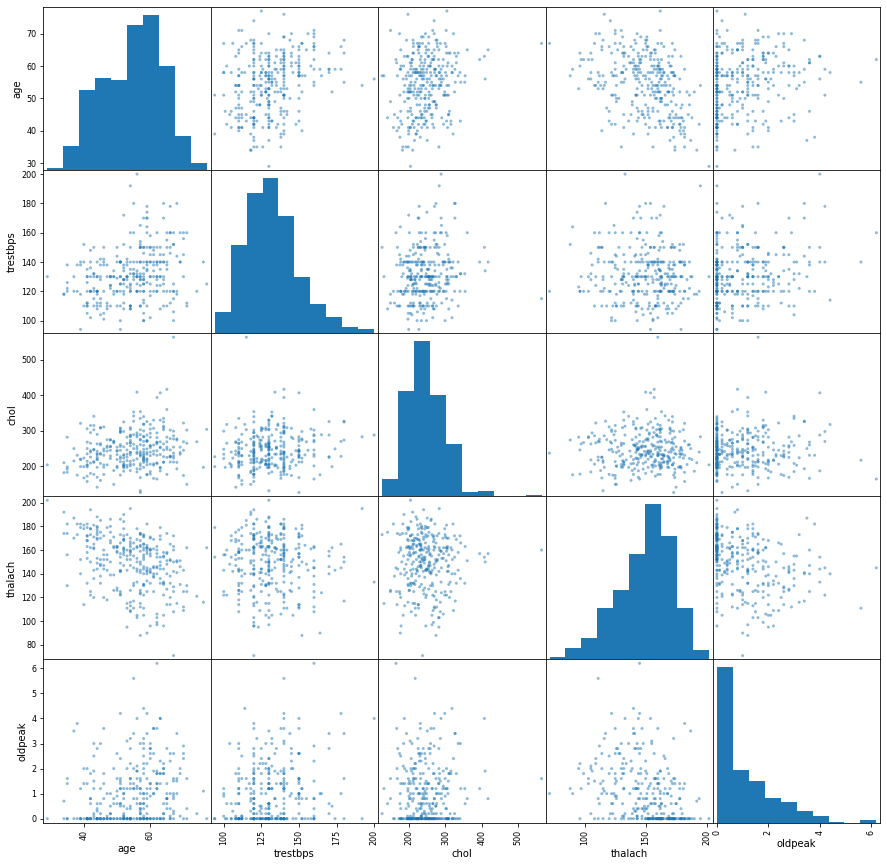

In [30]:
numdf = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
pd.plotting.scatter_matrix(numdf, figsize=(15,15))
plt.show()

### Age VS Trestbps

c:\Users\SGM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



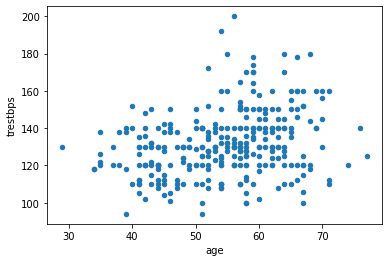

In [31]:
ax = df.plot.scatter(x='age', y='trestbps')

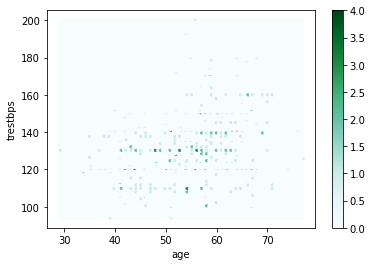

In [32]:
ax = df.plot.hexbin(x='age', y='trestbps', sharex=False)

<AxesSubplot: xlabel='age', ylabel='trestbps'>

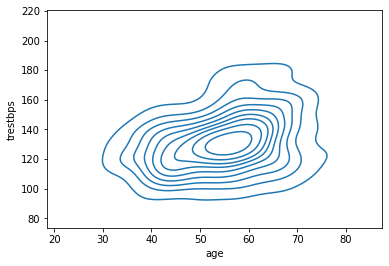

In [33]:
sns.kdeplot(data=df, x='age', y='trestbps')

Cierta pendiente positiva.

### Age VS Chol

c:\Users\SGM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



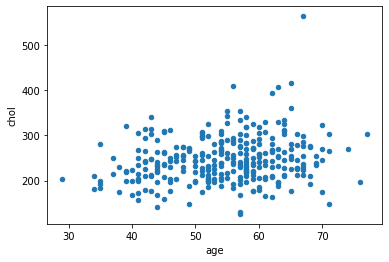

In [34]:
ax = df.plot.scatter(x='age', y='chol')

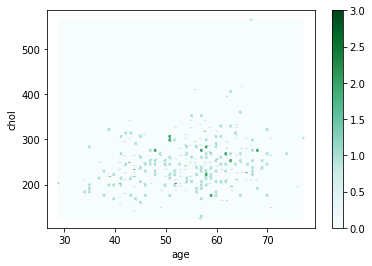

In [35]:
ax = df.plot.hexbin(x='age', y='chol', sharex=False)

<AxesSubplot: xlabel='age', ylabel='chol'>

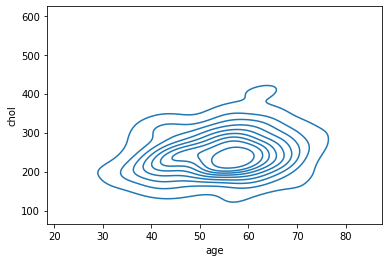

In [36]:
sns.kdeplot(data=df, x='age', y='chol')

### Age VS Thalach

c:\Users\SGM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



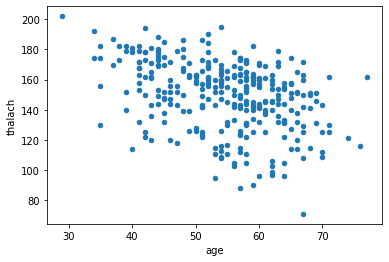

In [37]:
ax = df.plot.scatter(x='age', y='thalach')

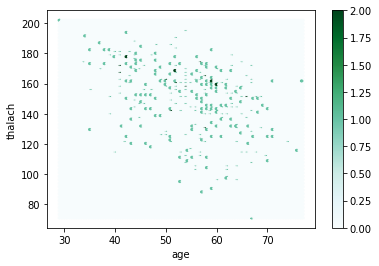

In [38]:
ax = df.plot.hexbin(x='age', y='thalach', sharex=False)

<AxesSubplot: xlabel='age', ylabel='thalach'>

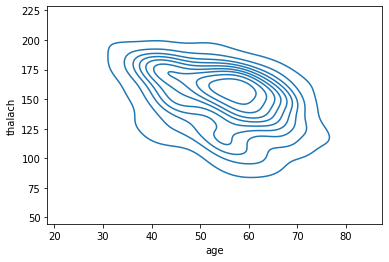

In [39]:
sns.kdeplot(data=df, x='age', y='thalach')

### Age VS Oldpeak

c:\Users\SGM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



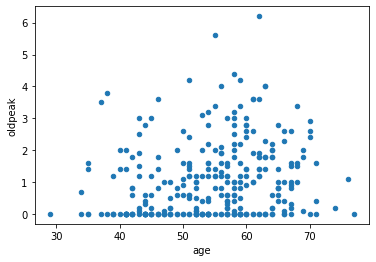

In [40]:
ax = df.plot.scatter(x='age', y='oldpeak')

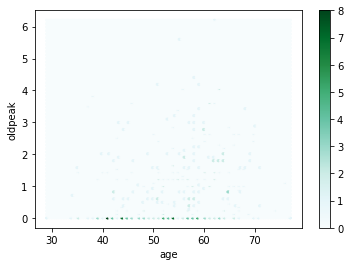

In [41]:
ax = df.plot.hexbin(x='age', y='oldpeak', sharex=False)

<AxesSubplot: xlabel='age', ylabel='oldpeak'>

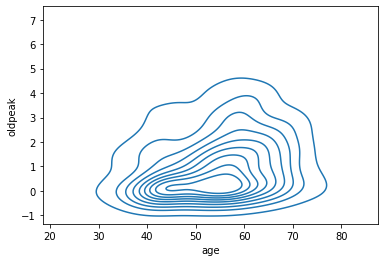

In [42]:
sns.kdeplot(data=df, x='age', y='oldpeak')

## Categorical VS Numerical

### Sex

age
trestbps
chol
thalach
oldpeak


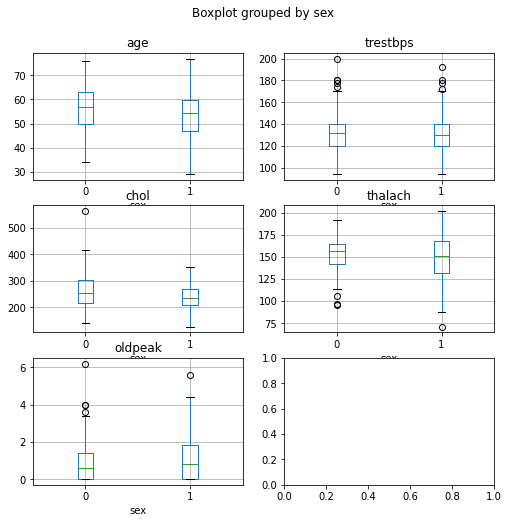

In [86]:
data = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex']]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for ax, column in zip(axes.flatten(), data.columns):
    if column == data.columns[-1]:
        continue
    # data.boxplot()
    print(column)
    data.boxplot(column=column, by=data.columns[-1], ax=ax)
    # if column == df

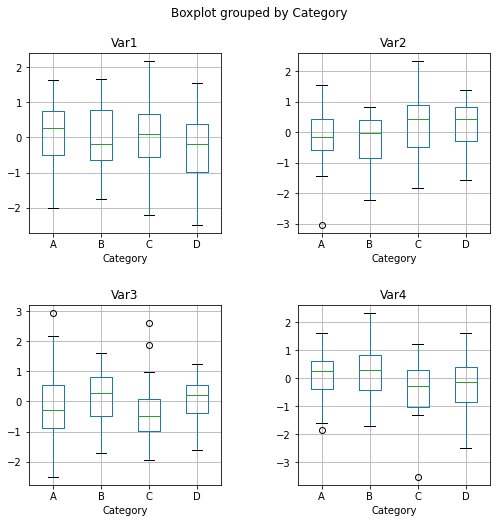

In [76]:
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D'] * 25,
    'Var1': np.random.randn(100),
    'Var2': np.random.randn(100),
    'Var3': np.random.randn(100),
    'Var4': np.random.randn(100)
})

# set figure size and layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# loop through numerical variables and create boxplots for each
for i, ax in enumerate(axes.flatten()):
    col = f'Var{i+1}'
    data.boxplot(column=col, by='Category', ax=ax)
    ax.set_title(col)
    # ax.set_xlabel('')
    
# adjust layout
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# show plot
plt.show()